In [314]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statistics as stat
import math
from scipy.stats import multivariate_normal
import pandas as pd
import seaborn as sns

# The data

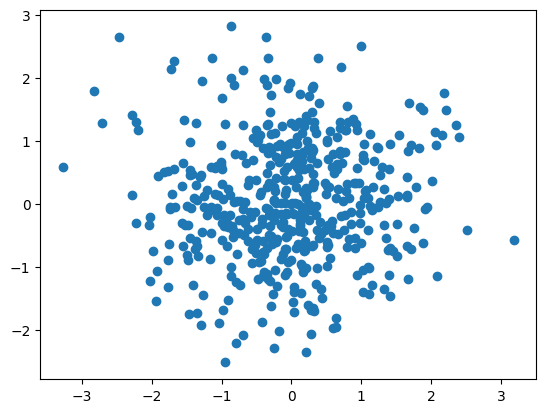

In [315]:
N=500
xgauss1=[rd.gauss(0,1) for i in range(N)]
xgauss2=[rd.gauss(0,1) for i in range(N)]

plt.scatter(xgauss1, xgauss2)

# Labeled Data Set

In [316]:
#init
n1 = 100
mean1 = (2.5, 2.5)
mat_cov1 = [[2, -0.8], [-0.8, 2]]

n2 = 200
mean2 = (0, 0)
mat_cov2 = [[1,0], [0,1]]

In [317]:
grp1 = np.random.multivariate_normal(mean1, mat_cov1, n1)
grp2 = np.random.multivariate_normal(mean2, mat_cov2, n2)

In [318]:
print(grp1.shape)
print(grp2.shape)

(100, 2)
(200, 2)


In [319]:
print("Mean of group 1:", np.mean(grp1, axis = 0)) #if axis = 0: column, axis = 1: row
print("Mean of group 2:", np.mean(grp2, axis = 0))
print("\n")
print("Standard deviation of group 1:", np.std(grp1, axis = 0)) #if axis = 0: column, axis = 1: row
print("Standard deviation of group 2:", np.std(grp2, axis = 0))

Mean of group 1: [2.66531804 2.54089331]
Mean of group 2: [-0.069343   -0.00422871]


Standard deviation of group 1: [1.49303746 1.60945724]
Standard deviation of group 2: [0.85817027 0.91765977]


In [320]:
print("Correlation of group 1:") 
np.cov(grp1[:,0], grp1[:,1])/np.sqrt(np.std(grp1, axis = 0)**2 * np.std(grp1, axis = 0)**2)

Correlation of group 1:


array([[ 1.01010101, -0.32409402],
       [-0.37660709,  1.01010101]])

In [321]:
print("Correlation of group 2:") 
np.cov(grp2[:,0], grp2[:,1])/np.sqrt(np.std(grp2, axis = 0)**2 * np.std(grp2, axis = 0)**2)

Correlation of group 2:


array([[ 1.00502513, -0.07539553],
       [-0.08621087,  1.00502513]])

In [322]:
np.corrcoef(grp2[:,0], grp2[:,1])

array([[ 1.        , -0.08021894],
       [-0.08021894,  1.        ]])

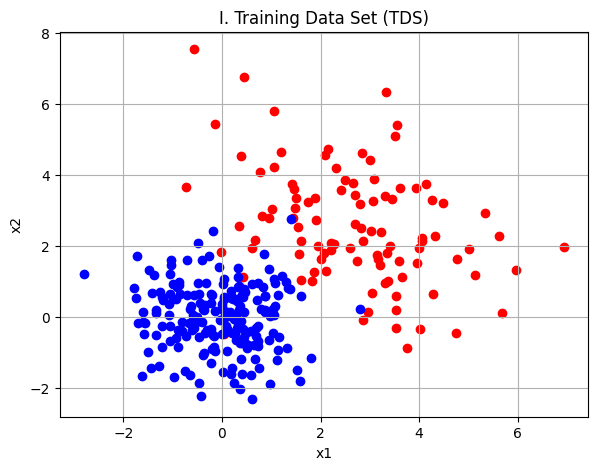

In [323]:
figure = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2, 1)

ax.scatter(grp1[:, 0], grp1[:, 1],c="red")
ax.scatter(grp2[:, 0], grp2[:, 1],c="blue")

ax.set_title('I. Training Data Set (TDS)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.grid()

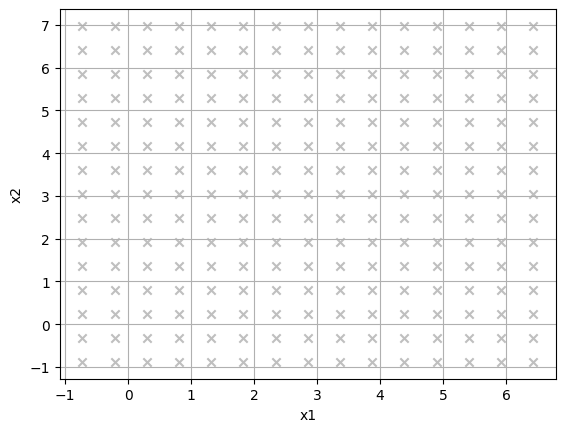

In [324]:
# New input

x1_min, x1_max = min(grp1[:,0]), max(grp1[:,0])
x2_min, x2_max = min(grp1[:,1]), max(grp1[:,1])
Neval=15
h1= (x1_max-x1_min)/Neval
h2= (x2_max-x2_min)/Neval

x1Eval, x2Eval = np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2))
xx1 = x1Eval.ravel()
xx2 = x2Eval.ravel()
Xgrid = np.column_stack((xx1, xx2))

plt.scatter(Xgrid[:, 0], Xgrid[:, 1], marker='x', color='gray', alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

# A first model of machine learning, the naive Bayes model

f(x) = decision
Y = real value (reality)

In [325]:
def get_prior(n1, n2):
    return n1/(n1+n2), n2/(n1+n2)

def get_likelihood(grp1, mean1, mat_cov1, grp2, mean2, mat_cov2):
    couple1 = [multivariate_normal.pdf(x, mean = mean1, cov = mat_cov1) for x in grp1]
    couple2 = [multivariate_normal.pdf(x, mean = mean2, cov = mat_cov2) for x in grp2]
    return couple1, couple2

def get_probab_total(prior, likelihood):
    res = (prior[0] * likelihood[0]) + (prior[1] * likelihood[1])
    return res

def get_posterior(prior, likelihood, probab_total):
    return (prior * likelihood) / probab_total

In [326]:
prior1, prior2 = get_prior(n1, n2)
likelihood1, likelihood2 = get_likelihood(grp1, mean1, mat_cov1, grp2, mean2, mat_cov2)
# probab_total = get_probab_total(get_prior(n1, n2), get_likelihood(grp1, mean1, mat_cov1, grp2, mean2, mat_cov2))

# Partie scikit-learn
## Calibration and fit of the model using Scikit learn

In [327]:
from sklearn.naive_bayes import GaussianNB

In [328]:
X = np.concatenate((grp1, grp2), axis = 0) # axis = 0: adds to row
# X[:100].shape #get first 100 elements correspond to class 1
# X[100:].shape #get first 100 elements correspond to class 0
Y = ([1] * n1) + ([0] * n2)

In [329]:
# init model
gnb = GaussianNB()
# fit model 
### The fit() method modifies the gnb object in-place and also returns the same object. 
### Therefore, gnb and gnb_fit are essentially references to the same trained model.
gnb_fit = gnb.fit(X, Y)
Y_pred = gnb_fit.predict(X)

### Model parameter analysis

In [330]:
print("Class Priors:", gnb.class_prior_)
print("Class Labels:", gnb.classes_)
print("Class Means (theta_):\n", gnb.theta_)
print("Class Variances:\n", gnb.var_)
print("Class Counts:", gnb.class_count_) #how many samples were used to estimate the parameters for each class

Class Priors: [0.66666667 0.33333333]
Class Labels: [0 1]
Class Means (theta_):
 [[-0.069343   -0.00422871]
 [ 2.66531804  2.54089331]]
Class Variances:
 [[0.73645622 0.84209946]
 [2.22916086 2.5903526 ]]
Class Counts: [200. 100.]


## First Evaluation of the model on training data
### Accuracy, precision, recall and F1-score

In [331]:
from sklearn import metrics

In [332]:
print("Accuracy:", metrics.accuracy_score(Y, Y_pred))
print("Precision:", metrics.precision_score(Y, Y_pred))
print("Recall:", metrics.recall_score(Y, Y_pred))
print("F1-score:", metrics.f1_score(Y, Y_pred))

Accuracy: 0.98
Precision: 0.9795918367346939
Recall: 0.96
F1-score: 0.9696969696969697


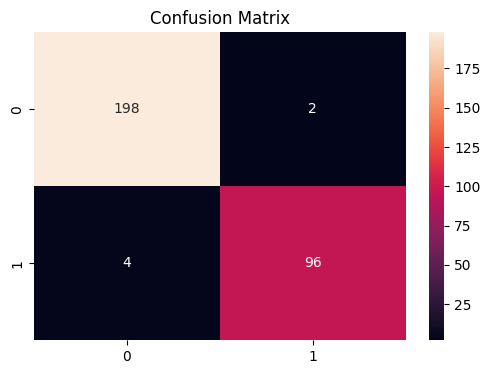

In [333]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(metrics.confusion_matrix(Y, Y_pred), annot=True, fmt='d')
ax.set_title("Confusion Matrix")
plt.show()

### AUC indicator

### The ROC Curve

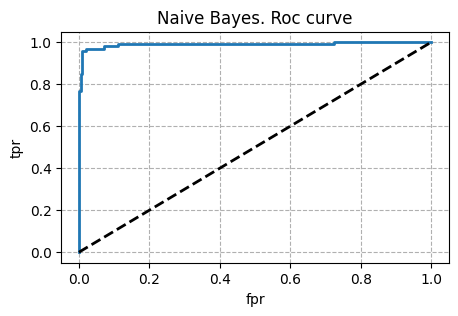

In [334]:
y_proba = gnb_fit.predict_proba(X)[:,1] # get 1D array containing the predicted probabilities that each sample in X belongs to class 1.
fpr, tpr, thresholds = metrics.roc_curve(Y, y_proba)
figure = plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, linewidth = 2)
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr, tpr, "k--", linewidth = 2)
plt.grid(linestyle = 'dashed') 
plt.show()

In [335]:
auc = metrics.roc_auc_score(Y, y_proba)
print("Area Under the Roc Curve (AUC):", auc)

Area Under the Roc Curve (AUC): 0.9892500000000001


## Evaluation of the predictive power/ capabilities of the model
### Cross-validation

In [336]:
from sklearn.model_selection import train_test_split

In [337]:
# a = list(grp1[:, 0]) + list(grp2[:, 0])
# b = list(grp1[:, 1]) + list(grp2[:, 1])

# new = []
# for j,k in zip(a,b):
#     new.append((j,k))

# Y_real = ([1] * n1) + ([0] * n2)

# df = pd.DataFrame({
#     'x1 and x2': new,
#     'Y': Y_real
# })

# df

In [338]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [339]:
print("Number of class 0 in training dataset:", Y_train.count(0))
print("Number of class 1 in training dataset:", Y_train.count(1))
print("Proportion of class 0 in training dataset:", Y_train.count(0)/len(Y_train))
print("Proportion of class 1 in training dataset:", Y_train.count(1)/len(Y_train))

Number of class 0 in training dataset: 130
Number of class 1 in training dataset: 70
Proportion of class 0 in training dataset: 0.65
Proportion of class 1 in training dataset: 0.35


In [340]:
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, Y_train)
Y_pred = gnb_fit.predict(X_test)
E_test = (Y_test != Y_pred).sum()/len(Y_test)
print("Error made on the test dataset:", E_test)

Error made on the test dataset: 0.04


In [341]:
# requires metrics 
def get_peformance(Y_real, Y_pred):
    print("Accuracy:", metrics.accuracy_score(Y_real, Y_pred))
    print("Error", sum(Y_real != Y_pred)/len(Y_real)) 
    print("Precision:", metrics.precision_score(Y_real, Y_pred))
    print("Recall:", metrics.recall_score(Y_real, Y_pred))
    print("F1-score:", metrics.f1_score(Y_real, Y_pred))

In [342]:
get_peformance(Y_test, Y_pred)

Accuracy: 0.96
Error 0.04
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1-score: 0.9333333333333333


Repeat the previous methodology K = 5 times (i.e. K random splits of both test and training data with similar proportions)
and provide a graph of both training and test performances for the different repetitions. Conclusion.

In [343]:
# init K times of CV
K = 5
# init performance dictionary for prediction on training dataset
train_perf = {
    'accuracy': [],
    'error': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
# init performance dictionary for prediction on test dataset
test_perf = {
    'accuracy': [],
    'error': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

for i in range(0,K):
    print(f"++++++++++++++++++++++ K = {i+1} +++++++++++++++++++++++ ")
    # split dataset, ATTENTION: stratify and shuffle are to ensure the proportion of 0 and 1 when split, Otherwise it will be the same 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, stratify=Y, shuffle=True)
    # print proportion of each class to see if there is bias in splitting
    print("Proportion of class 0 in training dataset:", Y_train.count(0)/len(Y_train))
    print("Proportion of class 1 in training dataset:", Y_train.count(1)/len(Y_train))
    # init model
    gnb = GaussianNB()
    # fit model
    gnb_fit = gnb.fit(X_train, Y_train)
    # make prediction on training  
    Y_pred_train = gnb_fit.predict(X_train)
    Y_pred_test = gnb_fit.predict(X_test)
    # store performance which we made prediction on training dataset
    train_perf['accuracy'].append(metrics.accuracy_score(Y_train, Y_pred_train))
    train_perf['error'].append(np.sum(Y_train != Y_pred_train)/len(Y_train))
    train_perf['precision'].append(metrics.precision_score(Y_train, Y_pred_train))
    train_perf['recall'].append(metrics.recall_score(Y_train, Y_pred_train))
    train_perf['f1_score'].append(metrics.f1_score(Y_train, Y_pred_train))
    # store performance which we made prediction on test dataset 
    test_perf['accuracy'].append(metrics.accuracy_score(Y_test, Y_pred_test))
    test_perf['error'].append(np.sum(Y_test != Y_pred_test)/len(Y_test))
    test_perf['precision'].append(metrics.precision_score(Y_test, Y_pred_test))
    test_perf['recall'].append(metrics.recall_score(Y_test, Y_pred_test))
    test_perf['f1_score'].append(metrics.f1_score(Y_test, Y_pred_test))
    print(f"++++++++++++++++++++++  End  +++++++++++++++++++++++\n")

#add mean to training performances
mean_accuracy = np.sum(train_perf['accuracy'])/K
mean_error = np.sum(train_perf['error'])/K
mean_precision = np.sum(train_perf['precision'])/K
mean_recall = np.sum(train_perf['recall'])/K
mean_f1 = np.sum(train_perf['f1_score'])/K

print("Dataframe indicates training performances:")
display(pd.DataFrame(train_perf))
display(pd.DataFrame({
    'accuracy_mean': [mean_accuracy],
    'error_mean': [mean_error], 
    'precision_mean': [mean_precision], 
    'recall_mean': [mean_recall], 
    'f1_score_mean': [mean_f1]
}))

#add mean to test performances
mean_accuracy = np.sum(test_perf['accuracy'])/K
mean_error = np.sum(test_perf['error'])/K
mean_precision = np.sum(test_perf['precision'])/K
mean_recall = np.sum(test_perf['recall'])/K
mean_f1 = np.sum(test_perf['f1_score'])/K
test_perf['mean'] = [mean_accuracy, mean_error, mean_precision, mean_recall, mean_f1]

print("Dataframe indicates testing performances:")
display(pd.DataFrame(test_perf))
display(pd.DataFrame({
    'accuracy_mean': [mean_accuracy],
    'error_mean': [mean_error], 
    'precision_mean': [mean_precision], 
    'recall_mean': [mean_recall], 
    'f1_score_mean': [mean_f1]
}))

++++++++++++++++++++++ K = 1 +++++++++++++++++++++++ 
Proportion of class 0 in training dataset: 0.665
Proportion of class 1 in training dataset: 0.335
++++++++++++++++++++++  End  +++++++++++++++++++++++

++++++++++++++++++++++ K = 2 +++++++++++++++++++++++ 
Proportion of class 0 in training dataset: 0.665
Proportion of class 1 in training dataset: 0.335
++++++++++++++++++++++  End  +++++++++++++++++++++++

++++++++++++++++++++++ K = 3 +++++++++++++++++++++++ 
Proportion of class 0 in training dataset: 0.665
Proportion of class 1 in training dataset: 0.335
++++++++++++++++++++++  End  +++++++++++++++++++++++

++++++++++++++++++++++ K = 4 +++++++++++++++++++++++ 
Proportion of class 0 in training dataset: 0.665
Proportion of class 1 in training dataset: 0.335
++++++++++++++++++++++  End  +++++++++++++++++++++++

++++++++++++++++++++++ K = 5 +++++++++++++++++++++++ 
Proportion of class 0 in training dataset: 0.665
Proportion of class 1 in training dataset: 0.335
++++++++++++++++++++++  

,accuracy,error,precision,recall,f1_score
0,0.965,0.035,0.968750,0.925373,0.946565
1,0.960,0.040,0.953846,0.925373,0.939394
2,0.990,0.010,0.985075,0.985075,0.985075
3,0.980,0.020,0.984615,0.955224,0.969697
4,0.985,0.015,0.984848,0.970149,0.977444


,accuracy_mean,error_mean,precision_mean,recall_mean,f1_score_mean
0,0.976,0.024,0.975427,0.952239,0.963635


Dataframe indicates testing performances:


,accuracy,error,precision,recall,f1_score,mean
0,1.00,0.00,1.000000,1.000000,1.000000,0.980000
1,1.00,0.00,1.000000,1.000000,1.000000,0.020000
2,0.95,0.05,0.911765,0.939394,0.925373,0.970042
3,0.98,0.02,0.969697,0.969697,0.969697,0.969697
4,0.97,0.03,0.968750,0.939394,0.953846,0.969783


,accuracy_mean,error_mean,precision_mean,recall_mean,f1_score_mean
0,0.98,0.02,0.970042,0.969697,0.969783


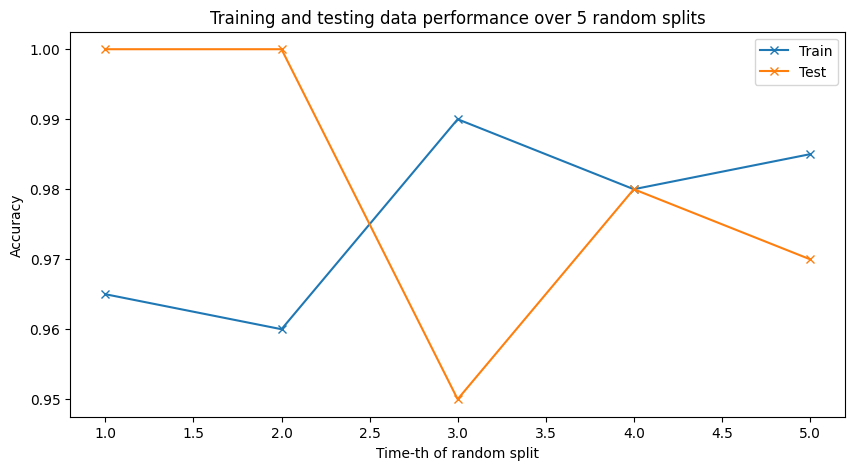

In [344]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, K+1), train_perf['accuracy'], label='Train', marker='x')
plt.plot(range(1, K+1), test_perf['accuracy'], label='Test', marker='x')
plt.title(f"Training and testing data performance over {K} random splits")
plt.xlabel("Time-th of random split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### K-fold


In [345]:
from sklearn.model_selection import KFold

In [346]:
# init nb of folds
K = 5
# init performance dictionary for prediction on training dataset
train_perf = {
    'accuracy': [],
    'error': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'auc': []
}
# init performance dictionary for prediction on test dataset
test_perf = {
    'accuracy': [],
    'error': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'auc': []
}

kf = KFold(n_splits = K, shuffle = True)

+++++++ Fold 1 +++++++
+++++++ End +++++++
+++++++ Fold 2 +++++++
+++++++ End +++++++
+++++++ Fold 3 +++++++
+++++++ End +++++++
+++++++ Fold 4 +++++++
+++++++ End +++++++
+++++++ Fold 5 +++++++
+++++++ End +++++++


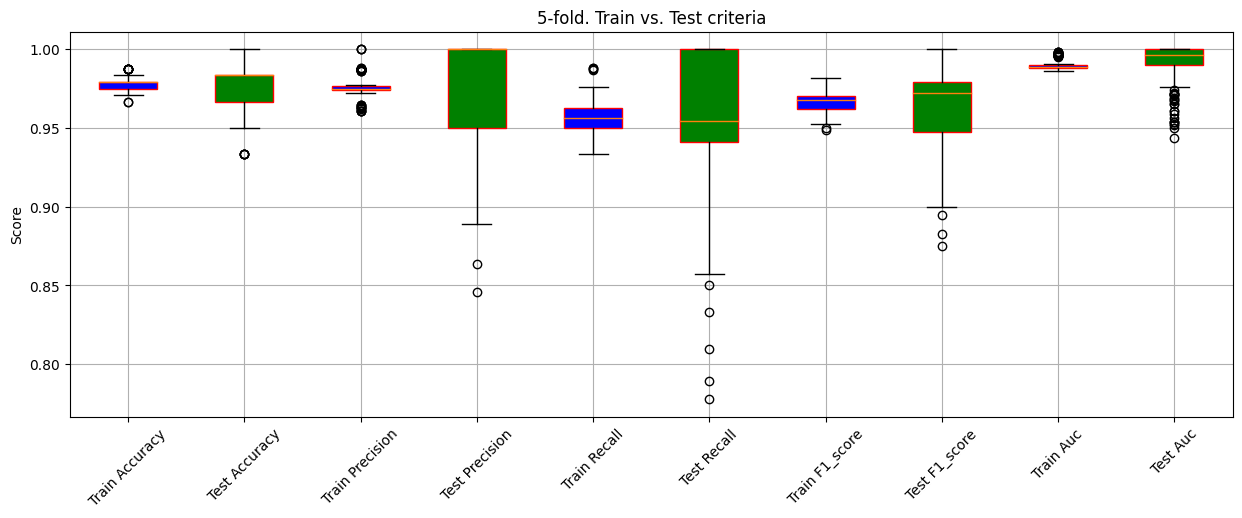

In [377]:
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"+++++++ Fold {fold + 1} +++++++")
    
    # Split data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = np.array(Y)[train_index], np.array(Y)[test_index]
    
    # Initialize and fit the Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    
    # Predictions
    Y_pred_train = gnb.predict(X_train)
    Y_pred_test = gnb.predict(X_test)
    
    # Compute performance metrics for training data
    train_perf['accuracy'].append(metrics.accuracy_score(Y_train, Y_pred_train))
    train_perf['precision'].append(metrics.precision_score(Y_train, Y_pred_train))
    train_perf['recall'].append(metrics.recall_score(Y_train, Y_pred_train))
    train_perf['f1_score'].append(metrics.f1_score(Y_train, Y_pred_train))
    train_perf['auc'].append(metrics.roc_auc_score(Y_train, gnb_fit.predict_proba(X_train)[:,1]))
    
    # Compute performance metrics for testing data
    test_perf['accuracy'].append(metrics.accuracy_score(Y_test, Y_pred_test))
    test_perf['precision'].append(metrics.precision_score(Y_test, Y_pred_test))
    test_perf['recall'].append(metrics.recall_score(Y_test, Y_pred_test))
    test_perf['f1_score'].append(metrics.f1_score(Y_test, Y_pred_test))
    test_perf['auc'].append(metrics.roc_auc_score(Y_test, gnb_fit.predict_proba(X_test)[:,1]))

    print(f"+++++++ End +++++++")
    
# Plot boxplot for train and test performance metrics
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']

# initialize figure
figure = plt.figure(figsize=(15, 5))

# Prepare data and labels for boxplots
data_to_plot = []
labels = []
colors = []

# Loop through each metric and append train and test data for boxplotting
for metric in metrics_to_plot:
    data_to_plot.append(train_perf[metric])  # Append train performance
    data_to_plot.append(test_perf[metric])   # Append test performance
    labels.append(f"Train {metric.capitalize()}")  # Label for train
    labels.append(f"Test {metric.capitalize()}")   # Label for test
    colors.append('blue')  # Color for train boxes
    colors.append('green') # Color for test boxes

# Create the boxplot with all the data and corresponding labels
boxplots = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)  # Set patch_artist=True for coloring

# Set colors for each box
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)  # Set the face color for the boxes
    patch.set_edgecolor('red')  # Set the edge color for better visibility

# Add title, grid, and display the plot
plt.title(f"{K}-fold. Train vs. Test criteria")
plt.ylabel('Score')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

# Classification learning machines

In [386]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, stratify=Y, shuffle=True)

In [388]:
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [389]:
lda.means_

array([[-0.15456442, -0.0289918 ],
       [ 2.59701767,  2.72041566]])

In [390]:
lda.classes_

array([0, 1])

In [391]:
lda.covariance_

array([[ 1.13034103, -0.38332367],
       [-0.38332367,  1.62584735]])

In [398]:
Y_pred = lda.predict(X_test)

In [399]:
get_peformance(Y_test, Y_pred)

Accuracy: 0.96
Error 0.04
Precision: 0.967741935483871
Recall: 0.9090909090909091
F1-score: 0.9375


In [400]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

In [401]:
qda.fit(X_train, Y_train)
Y_pred = qda.predict(X_test)
get_peformance(Y_test, Y_pred)

Accuracy: 0.98
Error 0.02
Precision: 0.9696969696969697
Recall: 0.9696969696969697
F1-score: 0.9696969696969697


In [421]:
df = pd.read_table("SAheart.txt", sep=',')
display(df)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0
